# Car Accident Severity Project

### The following project will be conducted using the CRISP-DM framework which is summarized below:
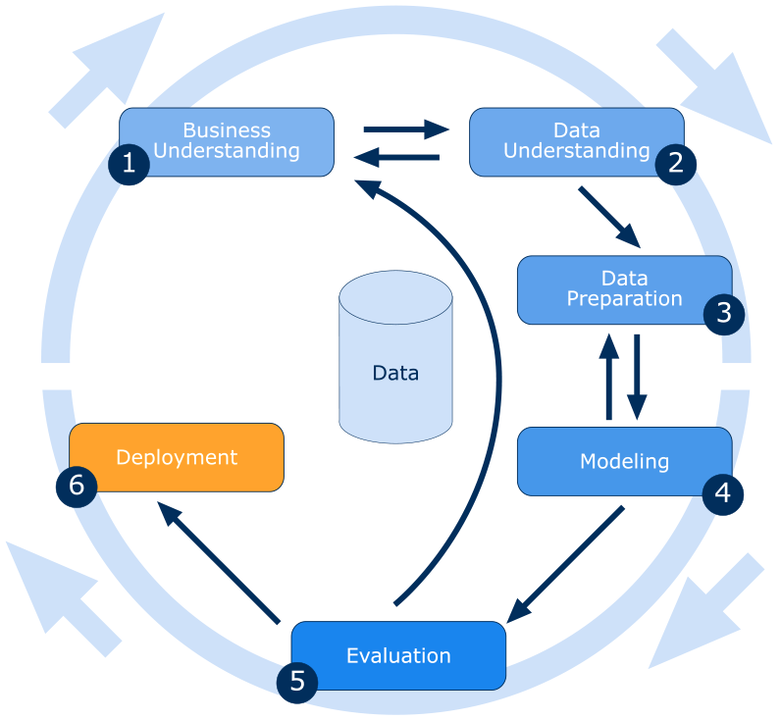

### 1. Business Understanding

In an aim to minimize the uncertainty around car accidents in Seattle city, the purpose of this project is to develop a warning system solution that will warn Seattle residents of the possibility of getting into a car accident and its potential severity, based on several critical factors. In particular, the project aims to answer the following 4 questions:
1. What is the impact of time of day on car accident severity?
2. What is the impact of road conditions on car accident severity?
3. What is the impact of junction type on car accident severity?
4. What is the impact of collision type on car accident severity?

A supervised learning algorithm will be developed to address this issue. The insights gained will hopefully increase awareness within the community around car travel safety and could even cause the user to change his/her travel journey if possible. The final solution will be presented to the Seattle Department of Transportation and Seattle Police, with the end-goal of developing a mobile application.

### 2. Data Understanding

The data is taken from the example csv dataset 'Data-Collisions' and can be accessed through the following link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv. 

Metadat can be accessed through this link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

We will explore the dataset to gain some basic insights into the attributes and the correlation to car accident severity.

In [8]:
import pandas as pd #load pandas library
import numpy as np #load numpy library 

car_accidents=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

Below is a sample of the data:

In [10]:
car_accidents.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [35]:
print(car_accidents.columns)
print(car_accidents.dtypes)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')
SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      ob

In [69]:
car_accidents.describe(include ="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [70]:
car_accidents.describe(include ="object")

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,115,62,2
top,1782439,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


In [44]:
car_accidents[['SEVERITYCODE','SEVERITYDESC']]

,SEVERITYCODE,SEVERITYDESC
0,2,Injury Collision
1,1,Property Damage Only Collision
2,1,Property Damage Only Collision
3,1,Property Damage Only Collision
4,2,Injury Collision
5,1,Property Damage Only Collision
6,1,Property Damage Only Collision
7,2,Injury Collision
8,1,Property Damage Only Collision
9,2,Injury Collision


As indicated above, the severity code consists of two values: 
- SEVERITYCODE=1 means Property Damage Only Collision
- SEVERITYCODE=2 means Injury Collision

In [49]:
df=car_accidents[['INCDTTM','ROADCOND','JUNCTIONTYPE','COLLISIONTYPE','SEVERITYCODE']]
df.head(5)

,INCDTTM,ROADCOND,JUNCTIONTYPE,COLLISIONTYPE,SEVERITYCODE
0,3/27/2013 2:54:00 PM,Wet,At Intersection (intersection related),Angles,2
1,12/20/2006 6:55:00 PM,Wet,Mid-Block (not related to intersection),Sideswipe,1
2,11/18/2004 10:20:00 AM,Dry,Mid-Block (not related to intersection),Parked Car,1
3,3/29/2013 9:26:00 AM,Dry,Mid-Block (not related to intersection),Other,1
4,1/28/2004 8:04:00 AM,Wet,At Intersection (intersection related),Angles,2


We will be examining INCDTTM,ROADCOND, JUNCTIONTYPE and COLLISIONTYPE to predict SEVERITYCODE. 

In [53]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64



In [60]:
df["ROADCOND"].dropna(axis=0,inplace=True)
df["JUNCTIONTYPE"].dropna(axis=0,inplace=True)
df["COLLISIONTYPE"].dropna(axis=0,inplace=True)

In [71]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [72]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [73]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [76]:
df['INCDTTM'].value_counts()

11/2/2006                 96
10/3/2008                 91
11/5/2005                 83
12/4/2004                 74
6/1/2006                  73
11/4/2006                 70
11/4/2005                 69
5/5/2006                  68
11/6/2006                 68
4/8/2006                  68
1/5/2007                  68
11/1/2005                 67
11/1/2008                 67
3/8/2006                  65
10/6/2006                 65
1/9/2006                  64
11/3/2006                 64
1/2/2004                  64
10/6/2005                 62
8/6/2004                  62
7/8/2005                  61
6/9/2005                  61
10/2/2007                 60
11/6/2008                 60
5/6/2009                  60
4/3/2006                  60
2/2/2006                  59
6/1/2007                  59
2/5/2008                  59
11/8/2006                 58
                          ..
9/24/2014 7:58:00 PM       1
6/11/2011 10:00:00 PM      1
4/5/2013 1:02:00 PM        1
9/14/2011 9:46

### 2.1 Data Understanding

From the above, we gain some insight in regards to the case with the highest accident count under each attribute:
- Incident time: 96 accidents occurred on 11/2/2006 
- Collisiton type: 47987 accidents included a Parked Car 
- Junction type: 89800 accidents occurred Mid-Block and are not related to intersection
- Road condition: 124510 accidents occurred on a Dry road